# Data Prep (For NB and Boosted Trees)

In [130]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

train_data = pd.read_csv('data/kaggle-disaster-tweets/train.csv')

# print(train_data.head())

VAL_SPLIT = 0.2

train_data.fillna('', inplace=True)

train_data['text_combined'] = train_data['keyword'].str.cat(train_data['text'], sep=' ') #we just combine it into one and them droo the rest

train_data = train_data.drop(['id', 'keyword'], axis=1)

# print("AFTER CLEANING")
# print(train_data.head())

X = train_data['text_combined']
y = train_data['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

print(len(X_train), len(X_val))

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

6090 1523


# NB and Boosted

In [119]:
from sklearn.model_selection import GridSearchCV

params_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Vary alpha from very small to large
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

grid_search = GridSearchCV(MultinomialNB(), params_grid, cv=5, scoring='accuracy')

best_model = grid_search.fit(X_train, y_train)

print("Best parameters:", best_model.best_params_)
print("Best cross-validation score (accuracy):", best_model.best_score_)

y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

Best parameters: {'alpha': 1.0, 'fit_prior': True}
Best cross-validation score (accuracy): 0.7980295566502462
Validation Accuracy: 0.7859487852921865
Validation F1 Score: 0.7831355914670465


In [126]:
model_nb = MultinomialNB(alpha=0.01, fit_prior=False)

model_nb.fit(X_train, y_train)
y_pred = model_nb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Validation F1 Score:", f1_score(y_val, y_pred, average='weighted'))

Validation Accuracy: 0.7708470124753776
Validation F1 Score: 0.7710430082075402


In [129]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimator_list = [750, 1000]
min_split_list = [2,4]
depth_list = [1,2,4]

for n_est in n_estimator_list:
    for min_s in min_split_list:
        for d in depth_list:

            model = GradientBoostingClassifier(n_estimators=n_est, learning_rate=0.1, max_depth=d, random_state=42, min_samples_split=min_s, loss='log_loss')

            model.fit(X_train, y_train)

            #val
            y_val_pred = model.predict(X_val)

            accuracy = accuracy_score(y_val, y_val_pred)
            f1 = f1_score(y_val, y_val_pred, average='weighted')
            print(f"Using Params: n_estimators={n_est}, min_split={min_s}, max_depth={d}")
            # print("Validation Accuracy:", accuracy)
            print("Validation F1 Score:", f1)

            # print("Classification Report:")
            # print(classification_report(y_val, y_val_pred))

Using Params: n_estimators=750, min_split=2, max_depth=1
Validation F1 Score: 0.7596924014439127
Using Params: n_estimators=750, min_split=2, max_depth=2
Validation F1 Score: 0.7727759940422982
Using Params: n_estimators=750, min_split=2, max_depth=4
Validation F1 Score: 0.7812164088390979
Using Params: n_estimators=750, min_split=4, max_depth=1
Validation F1 Score: 0.7596924014439127
Using Params: n_estimators=750, min_split=4, max_depth=2
Validation F1 Score: 0.7737971467402597
Using Params: n_estimators=750, min_split=4, max_depth=4
Validation F1 Score: 0.7837104123567799
Using Params: n_estimators=1000, min_split=2, max_depth=1
Validation F1 Score: 0.7614085826588235
Using Params: n_estimators=1000, min_split=2, max_depth=2
Validation F1 Score: 0.7768095562782339
Using Params: n_estimators=1000, min_split=2, max_depth=4
Validation F1 Score: 0.7805557372356912
Using Params: n_estimators=1000, min_split=4, max_depth=1
Validation F1 Score: 0.7614085826588235
Using Params: n_estimators

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

params_grid = {
    'loss': ['log_loss'],
    'learning_rate': [1e-1],
    'n_estimators': [750, 1000],
    'min_samples_split': [1, 2],
    'max_depth': [1, 2, 4], #1 is adaboost?
    'random_state': [42]
}

grid_search = GridSearchCV(GradientBoostingClassifier(), params_grid, cv=5, scoring='accuracy', n_jobs=5, verbose=2)

best_model = grid_search.fit(X_train, y_train)

print("Best parameters:", best_model.best_params_)
print("Best cross-validation score (accuracy):", best_model.best_score_)

y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred, average='weighted'))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=750, random_state=42; total time=  41.0s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=750, random_state=42; total time=  41.2s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=750, random_state=42; total time=  41.3s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=750, random_state=42; total time=  41.4s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=750, random_state=42; total time=  41.5s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=1000, random_state=42; total time=  53.6s
[CV] END learning_rate=0.1, loss=log_loss, max_depth=4, min_samples_split=2, n_estimators=1000, random_state=42; total time=  54.0s
[CV] END learning_rat

# MLP

Validating -- Epoch 46/50: 100%|██████████| 48/48 [00:00<00:00, 54.43it/s]




Epoch 46
Train Loss: 0.2238
Val Loss: 0.4608
Val Accuracy: 0.7886
F1 Score:0.7873411000150623
Best Acc So Far:0.8017071569271176
Current LR: [3.0000000000000004e-08]



Validating -- Epoch 47/50: 100%|██████████| 48/48 [00:00<00:00, 57.06it/s]




Epoch 47
Train Loss: 0.2253
Val Loss: 0.4608
Val Accuracy: 0.7886
F1 Score:0.7873411000150623
Best Acc So Far:0.8017071569271176
Current LR: [3.0000000000000004e-08]



Validating -- Epoch 48/50: 100%|██████████| 48/48 [00:00<00:00, 57.12it/s]




Epoch 48
Train Loss: 0.2242
Val Loss: 0.4608
Val Accuracy: 0.7886
F1 Score:0.7873411000150623
Best Acc So Far:0.8017071569271176
Current LR: [3.0000000000000004e-08]



Validating -- Epoch 49/50: 100%|██████████| 48/48 [00:00<00:00, 57.65it/s]




Epoch 49
Train Loss: 0.2234
Val Loss: 0.4608
Val Accuracy: 0.7886
F1 Score:0.7873411000150623
Best Acc So Far:0.8017071569271176
Current LR: [3.0000000000000004e-08]



Validating -- Epoch 50/50: 100%|██████████| 48/48 [00:00<00:00, 52.78it/s]




Epoch 50
Train Loss: 0.2236
Val Loss: 0.4608
Val Accuracy: 0.7886
F1 Score:0.7873411000150623
Best Acc So Far:0.8017071569271176
Current LR: [3.0000000000000004e-09]

Total Time Taken: 6.817164786656698 min
Best Validation Accuracy: 0.8017071569271176


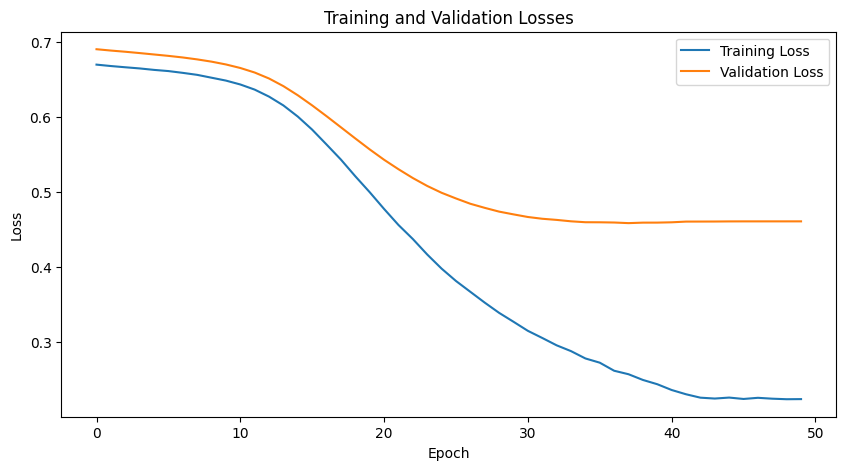

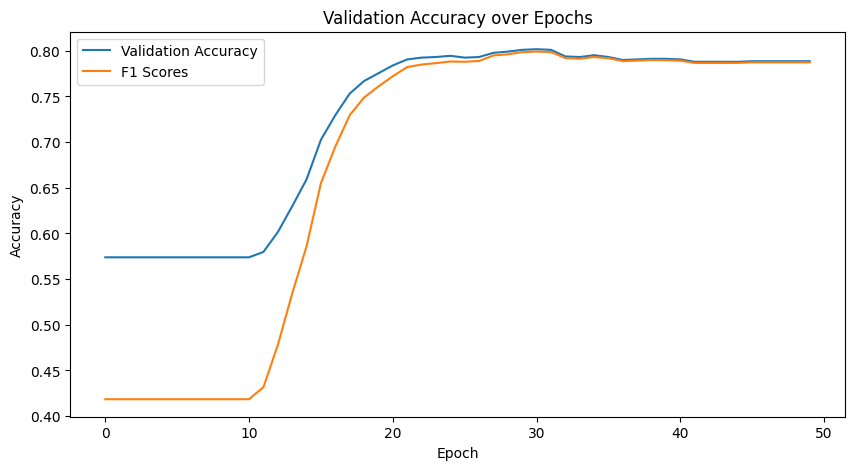

In [176]:
import torch
import torch.nn as nn
# import torchmetrics
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
import os

from tqdm.auto import tqdm #see progress
import time #track train time
from IPython.display import clear_output #clean up output

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

#other stuff
save_dir = ""

#hyperparams
BATCH_SIZE = 32
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2

#load data
df_train = pd.read_csv('data/kaggle-disaster-tweets/train.csv')
df_train.fillna('', inplace=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_train['text']).toarray()
y = df_train['target'].values

import joblib

#fit the vectorizer and transform training data
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train = vectorizer.fit_transform(df_train['text'])

#save the fitted vectorizer, i need to use this for test set stuff later
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

# print(X)
# print(y)

#splitting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

#need to define custom classes bc datalodaer needs to use
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'texts': torch.tensor(self.texts[idx], dtype=torch.float32).to(device),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
        }

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(X_train, y_train)
val_dataset = TweetDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

#naive
class TweetClassifier(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.4):
        super(TweetClassifier, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, 2),
            nn.ReLU()
        )

    def forward(self, x):
        return self.sequence(x)

model = TweetClassifier(num_features=X_train.shape[1]).to(device)
#model specific hyperparams
EPOCHS = 50
LEARNING_RATE = 3e-6

#model specific choices
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-3)
# optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-3)
# optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.5, weight_decay=1e-4)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

def save_checkpoint(save_dir, model, save_name = 'best_model.pth'):
    save_path = os.path.join(save_dir, save_name)
    torch.save(model.state_dict(), save_path)

def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(data_loader, desc=f"Training -- Epoch {epoch+1}/{EPOCHS}"):
        optimizer.zero_grad()
        inputs, labels = batch['texts'].to(device), batch['labels'].to(device)
        outputs = model(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_preds = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc=f"Validating -- Epoch {epoch+1}/{EPOCHS}"):
            inputs, labels = batch['texts'], batch['labels']
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs, dim=1)  #convert logits to class predictions
            correct_preds += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())  #collect all predictions
            all_labels.extend(labels.cpu().numpy())    #collect all labels

    # Calculate overall F1 score
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return total_loss / len(data_loader), correct_preds / len(data_loader.dataset), f1

#store for plotting
train_losses = []
val_losses = []
val_accuracies = []
max_val_accuracy = -np.inf
f1_scores = []

#running the training and validation
start_time = time.time()
for epoch in range(EPOCHS):
    if epoch % 5 == 0: clear_output(wait=True)
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    val_loss, val_accuracy, f1 = evaluate_model(model, val_loader, criterion)
    
    lr_scheduler.step(val_loss)
    
    #store metrics
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    f1_scores.append(f1)
    
    if val_accuracy >= max_val_accuracy:
        max_val_accuracy = val_accuracy
        print("Saving Model")
        save_checkpoint(save_dir, model, save_name = 'best_model.pth')
    
    print(f'\n\nEpoch {epoch+1}\nTrain Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}\nVal Accuracy: {val_accuracy:.4f}\nF1 Score:{f1}\nBest Acc So Far:{max_val_accuracy}\nCurrent LR: {lr_scheduler.get_last_lr()}\n')
    
print(f"Total Time Taken: {(time.time() - start_time)/60} min")
print(f"Best Validation Accuracy: {max_val_accuracy}")
#plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show

#plotting the accuracies
plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(f1_scores, label='F1 Scores')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test Set Predis

In [177]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

class TweetClassifier(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifier, self).__init__()
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, 2),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.sequence(x)

model = TweetClassifier(num_features=10000).to(device)

# Load the state dictionary from the file
# state_dict = torch.load('best_model.pth')

# Print each layer's dimension
# for param_tensor in state_dict:
    # print(param_tensor, "\t", state_dict[param_tensor].size())

model.load_state_dict(torch.load('best_model.pth'))
model.eval()

print(model)

#handle test data stuff
df_test = pd.read_csv('data/kaggle-disaster-tweets/test.csv')
df_test.fillna('', inplace=True)

#this is the same vectorizer that we used in train and val
vectorizer = joblib.load('tfidf_vectorizer.joblib')

X_test = vectorizer.transform(df_test['text']).toarray()

#this needs to be custom again bc we don't have target labels
class TweetTestDataset(Dataset):
    def __init__(self, texts):
        self.texts = texts
    
    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx], dtype=torch.float32).to(device)
    
    def __len__(self):
        return len(self.texts)

test_dataset = TweetTestDataset(X_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

predictions = []
with torch.no_grad():
    for inputs in tqdm(test_loader, desc="Testing"):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        predictions.extend(predicted.cpu().numpy())

#saves to csv in the particular format for kaggle with the id
results_df = pd.DataFrame({
    'id': df_test['id'],
    'target': predictions
})
results_df.to_csv('test_predictions.csv', index=False)

TweetClassifier(
  (sequence): Sequential(
    (0): Linear(in_features=10000, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.35, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.35, inplace=False)
    (6): Linear(in_features=4096, out_features=2, bias=True)
    (7): ReLU()
  )
)


Testing: 100%|██████████| 102/102 [00:01<00:00, 77.63it/s]


# Comparing MLP varying performance

Validating -- Epoch 56/60: 100%|██████████| 48/48 [00:00<00:00, 50.20it/s]




Epoch 56
Train Loss: 0.1321
Val Loss: 0.5239
Val Accuracy: 0.7669
F1 Score:0.7675217423147869
Best Acc So Far:0.7866053841103086
Current LR: [3.0000000000000004e-09]



Validating -- Epoch 57/60: 100%|██████████| 48/48 [00:01<00:00, 43.07it/s]




Epoch 57
Train Loss: 0.1331
Val Loss: 0.5167
Val Accuracy: 0.7833
F1 Score:0.782360110191518
Best Acc So Far:0.7866053841103086
Current LR: [3.0000000000000004e-09]



Validating -- Epoch 58/60: 100%|██████████| 48/48 [00:00<00:00, 52.44it/s]




Epoch 58
Train Loss: 0.1328
Val Loss: 0.5151
Val Accuracy: 0.7840
F1 Score:0.7826235571455635
Best Acc So Far:0.7866053841103086
Current LR: [3.0000000000000004e-09]



Validating -- Epoch 59/60: 100%|██████████| 48/48 [00:00<00:00, 51.61it/s]




Epoch 59
Train Loss: 0.1328
Val Loss: 0.5167
Val Accuracy: 0.7846
F1 Score:0.7832524464951595
Best Acc So Far:0.7866053841103086
Current LR: [3.0000000000000004e-09]



Validating -- Epoch 60/60: 100%|██████████| 48/48 [00:00<00:00, 51.76it/s]




Epoch 60
Train Loss: 0.1331
Val Loss: 0.5241
Val Accuracy: 0.7708
F1 Score:0.7712779733586753
Best Acc So Far:0.7866053841103086
Current LR: [3.0000000000000004e-09]



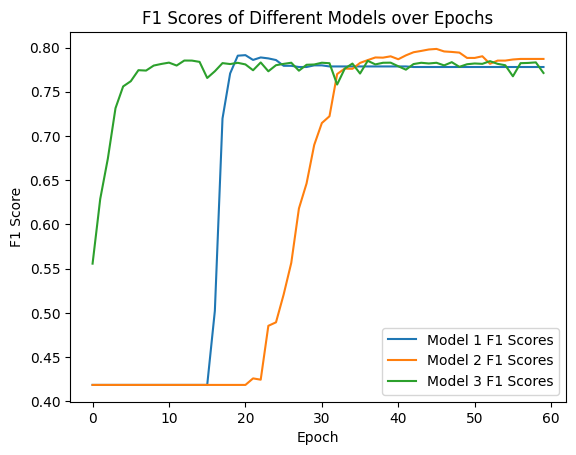

In [146]:
import torch
import torch.nn as nn
# import torchmetrics
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
import os

from tqdm.auto import tqdm
import time
from IPython.display import clear_output

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

#other stuff
save_dir = ""

#hyperparams
BATCH_SIZE = 32
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2

df_train = pd.read_csv('data/kaggle-disaster-tweets/train.csv')
df_train.fillna('', inplace=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_train['text']).toarray()
y = df_train['target'].values

# print(X)
# print(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'texts': torch.tensor(self.texts[idx], dtype=torch.float32).to(device),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
        }

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(X_train, y_train)
val_dataset = TweetDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

class TweetClassifierOne(nn.Module):
    def __init__(self, num_features, hidden_count=1024, dropout_p=0.35):
        super(TweetClassifierOne, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, 2)
        )

    def forward(self, x):
        return self.sequence(x)
    
class TweetClassifierTwo(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifierTwo, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
        )

    def forward(self, x):
        return self.sequence(x)
    
class TweetClassifierThree(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifierThree, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.BatchNorm1d(hidden_count),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count, hidden_count // 2),
            nn.BatchNorm1d(hidden_count // 2),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count // 2, hidden_count // 4),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count // 4, 2)
        )

    def forward(self, x):
        return self.sequence(x)

def save_checkpoint(save_dir, model, save_name = 'best_model.pth'):
    save_path = os.path.join(save_dir, save_name)
    torch.save(model.state_dict(), save_path)

def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(data_loader, desc=f"Training -- Epoch {epoch+1}/{EPOCHS}"):
        optimizer.zero_grad()
        inputs, labels = batch['texts'].to(device), batch['labels'].to(device)
        outputs = model(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_preds = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc=f"Validating -- Epoch {epoch+1}/{EPOCHS}"):
            inputs, labels = batch['texts'], batch['labels']
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs, dim=1)  # Convert logits to class predictions
            correct_preds += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())  # Collect all predictions
            all_labels.extend(labels.cpu().numpy())    # Collect all labels

    f1 = f1_score(all_labels, all_preds, average='weighted')

    return total_loss / len(data_loader), correct_preds / len(data_loader.dataset), f1

models = [TweetClassifierOne, TweetClassifierTwo, TweetClassifierThree]

all_f1_scores = []

#this is just an adjusted overall one with all the models, and we plot them all on the same graph
for i, chosen_model in enumerate(models):
    model = chosen_model(num_features=X_train.shape[1]).to(device)
    EPOCHS = 50
    LEARNING_RATE = 3e-6

    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-3)
    lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    train_losses = []
    val_losses = []
    val_accuracies = []
    max_val_accuracy = -np.inf
    f1_scores = []

    start_time = time.time()
    for epoch in range(EPOCHS):
        if epoch % 5 == 0: clear_output(wait=True)
        train_loss = train_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_accuracy, f1 = evaluate_model(model, val_loader, criterion)
        
        lr_scheduler.step(val_loss)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        f1_scores.append(f1)
        
        if val_accuracy >= max_val_accuracy:
            max_val_accuracy = val_accuracy
            print("Saving Model")
        
        print(f'\n\nEpoch {epoch+1}\nTrain Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}\nVal Accuracy: {val_accuracy:.4f}\nF1 Score:{f1}\nBest Acc So Far:{max_val_accuracy}\nCurrent LR: {lr_scheduler.get_last_lr()}\n')
        
    all_f1_scores.append(f1_scores)

#plot each model's F1 scores with a separate label
for i, scores in enumerate(all_f1_scores):
    plt.plot(scores, label=f'Model {i+1} F1 Scores')

plt.title('F1 Scores of Different Models over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [ ]:
for chosen_model in models:
    instance = chosen_model(num_features=X_train.shape[1])
    print(instance)

Validating -- Epoch 46/50: 100%|██████████| 48/48 [00:00<00:00, 53.05it/s]


Saving Model


Epoch 46
Train Loss: 6.7112
Val Loss: 6.9123
Val Accuracy: 0.5739
F1 Score:0.4184898446323389
Best Acc So Far:0.5738673670387393
Current LR: [3e-07]



Validating -- Epoch 47/50: 100%|██████████| 48/48 [00:00<00:00, 55.20it/s]


Saving Model


Epoch 47
Train Loss: 6.6488
Val Loss: 6.8473
Val Accuracy: 0.5739
F1 Score:0.4184898446323389
Best Acc So Far:0.5738673670387393
Current LR: [3e-07]



Validating -- Epoch 48/50: 100%|██████████| 48/48 [00:00<00:00, 49.34it/s]


Saving Model


Epoch 48
Train Loss: 6.5843
Val Loss: 6.7804
Val Accuracy: 0.5739
F1 Score:0.4184898446323389
Best Acc So Far:0.5738673670387393
Current LR: [3e-07]



Validating -- Epoch 49/50: 100%|██████████| 48/48 [00:00<00:00, 55.22it/s]


Saving Model


Epoch 49
Train Loss: 6.5172
Val Loss: 6.7114
Val Accuracy: 0.5739
F1 Score:0.4184898446323389
Best Acc So Far:0.5738673670387393
Current LR: [3e-07]



Validating -- Epoch 50/50: 100%|██████████| 48/48 [00:00<00:00, 50.87it/s]


Saving Model


Epoch 50
Train Loss: 6.4488
Val Loss: 6.6403
Val Accuracy: 0.5739
F1 Score:0.4184898446323389
Best Acc So Far:0.5738673670387393
Current LR: [3e-07]

lr 3e-05 max= 0.7889864222466474
lr 3e-06 max= 0.7976474914367861
lr 3e-07 max= 0.511386623748327


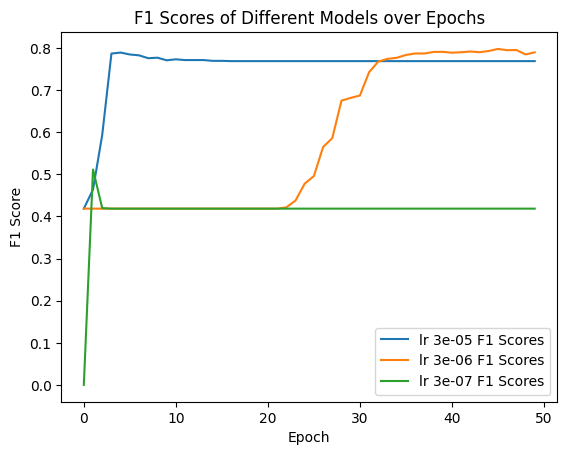

In [150]:
import torch
import torch.nn as nn
# import torchmetrics
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
import os

from tqdm.auto import tqdm
import time
from IPython.display import clear_output

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

save_dir = ""

BATCH_SIZE = 32
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2

df_train = pd.read_csv('data/kaggle-disaster-tweets/train.csv')
df_train.fillna('', inplace=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_train['text']).toarray()
y = df_train['target'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'texts': torch.tensor(self.texts[idx], dtype=torch.float32).to(device),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
        }

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(X_train, y_train)
val_dataset = TweetDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

class TweetClassifierOne(nn.Module):
    def __init__(self, num_features, hidden_count=1024, dropout_p=0.35):
        super(TweetClassifierOne, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, 2)
        )

    def forward(self, x):
        return self.sequence(x)
    
class TweetClassifierTwo(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifierTwo, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
        )

    def forward(self, x):
        return self.sequence(x)
    
class TweetClassifierThree(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifierThree, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.BatchNorm1d(hidden_count),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count, hidden_count // 2),
            nn.BatchNorm1d(hidden_count // 2),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count // 2, hidden_count // 4),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count // 4, 2)
        )

    def forward(self, x):
        return self.sequence(x)

def save_checkpoint(save_dir, model, save_name = 'best_model.pth'):
    save_path = os.path.join(save_dir, save_name)
    torch.save(model.state_dict(), save_path)

def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(data_loader, desc=f"Training -- Epoch {epoch+1}/{EPOCHS}"):
        optimizer.zero_grad()
        inputs, labels = batch['texts'].to(device), batch['labels'].to(device)
        outputs = model(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_preds = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc=f"Validating -- Epoch {epoch+1}/{EPOCHS}"):
            inputs, labels = batch['texts'], batch['labels']
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    f1 = f1_score(all_labels, all_preds, average='weighted')

    return total_loss / len(data_loader), correct_preds / len(data_loader.dataset), f1

all_f1_scores = []

learning_rates = [3e-5, 3e-6, 3e-7]

# for i, chosen_model in enumerate(models):
#asked to vary learn rates
for i, chosen_lr in enumerate(learning_rates):
    model = TweetClassifierTwo(num_features=X_train.shape[1]).to(device)
    EPOCHS = 50
    LEARNING_RATE = 3e-6

    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=chosen_lr, weight_decay=1e-3)
    lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    train_losses = []
    val_losses = []
    val_accuracies = []
    max_val_accuracy = -np.inf
    f1_scores = []

    start_time = time.time()
    for epoch in range(EPOCHS):
        if epoch % 5 == 0: clear_output(wait=True)
        train_loss = train_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_accuracy, f1 = evaluate_model(model, val_loader, criterion)
        
        lr_scheduler.step(val_loss)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        f1_scores.append(f1)
        
        if val_accuracy >= max_val_accuracy:
            max_val_accuracy = val_accuracy
        
        print(f'\n\nEpoch {epoch+1}\nTrain Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}\nVal Accuracy: {val_accuracy:.4f}\nF1 Score:{f1}\nBest Acc So Far:{max_val_accuracy}\nCurrent LR: {lr_scheduler.get_last_lr()}\n')
        
    all_f1_scores.append(f1_scores)
        
for i, scores in enumerate(all_f1_scores):
    print(f"lr {learning_rates[i]} max=",max(scores))
    plt.plot(scores, label=f'lr {learning_rates[i]} F1 Scores')

plt.title('F1 Scores of Different Models over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Validating -- Epoch 46/50: 100%|██████████| 48/48 [00:00<00:00, 57.03it/s]




Epoch 46
Train Loss: 0.3216
Val Loss: 0.4757
Val Accuracy: 0.7932
F1 Score:0.7914935024045627
Best Acc So Far:0.7997373604727511
Current LR: [3e-06]



Validating -- Epoch 47/50: 100%|██████████| 48/48 [00:00<00:00, 54.13it/s]




Epoch 47
Train Loss: 0.3150
Val Loss: 0.4722
Val Accuracy: 0.7945
F1 Score:0.7925494083518534
Best Acc So Far:0.7997373604727511
Current LR: [3e-06]



Validating -- Epoch 48/50: 100%|██████████| 48/48 [00:00<00:00, 56.79it/s]


Saving Model


Epoch 48
Train Loss: 0.3077
Val Loss: 0.4699
Val Accuracy: 0.8004
F1 Score:0.7976951257173417
Best Acc So Far:0.8003939592908733
Current LR: [3e-06]



Validating -- Epoch 49/50: 100%|██████████| 48/48 [00:00<00:00, 55.32it/s]




Epoch 49
Train Loss: 0.2996
Val Loss: 0.4687
Val Accuracy: 0.7997
F1 Score:0.7972174556740793
Best Acc So Far:0.8003939592908733
Current LR: [3e-06]



Validating -- Epoch 50/50: 100%|██████████| 48/48 [00:00<00:00, 53.07it/s]




Epoch 50
Train Loss: 0.2899
Val Loss: 0.4681
Val Accuracy: 0.7951
F1 Score:0.7931778908442336
Best Acc So Far:0.8003939592908733
Current LR: [3e-06]

lr 3e-05 max= 0.7943199800983085
lr 3e-06 max= 0.7976951257173417


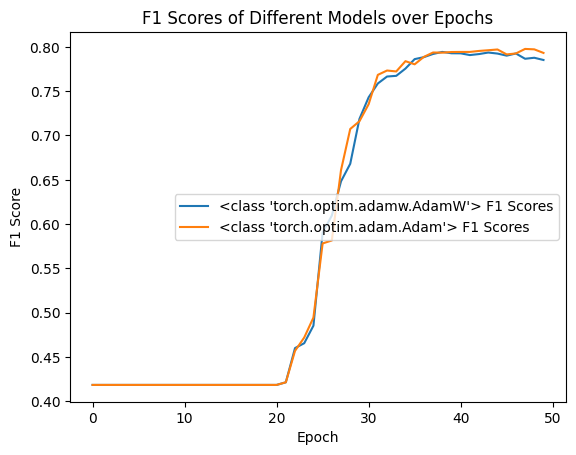

In [159]:
import torch
import torch.nn as nn
# import torchmetrics
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
import os

from tqdm.auto import tqdm
import time
from IPython.display import clear_output

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

save_dir = ""

BATCH_SIZE = 32
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2

df_train = pd.read_csv('data/kaggle-disaster-tweets/train.csv')
df_train.fillna('', inplace=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_train['text']).toarray()
y = df_train['target'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)

class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'texts': torch.tensor(self.texts[idx], dtype=torch.float32).to(device),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
        }

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(X_train, y_train)
val_dataset = TweetDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

class TweetClassifierOne(nn.Module):
    def __init__(self, num_features, hidden_count=1024, dropout_p=0.35):
        super(TweetClassifierOne, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, 2)
        )

    def forward(self, x):
        return self.sequence(x)
    
class TweetClassifierTwo(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifierTwo, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
        )

    def forward(self, x):
        return self.sequence(x)
    
class TweetClassifierThree(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifierThree, self).__init__()
        
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.BatchNorm1d(hidden_count),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count, hidden_count // 2),
            nn.BatchNorm1d(hidden_count // 2),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count // 2, hidden_count // 4),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(hidden_count // 4, 2)
        )

    def forward(self, x):
        return self.sequence(x)

def save_checkpoint(save_dir, model, save_name = 'best_model.pth'):
    save_path = os.path.join(save_dir, save_name)
    torch.save(model.state_dict(), save_path)

def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    total_loss = 0
    for batch in tqdm(data_loader, desc=f"Training -- Epoch {epoch+1}/{EPOCHS}"):
        optimizer.zero_grad()
        inputs, labels = batch['texts'].to(device), batch['labels'].to(device)
        outputs = model(inputs).to(device)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0
    correct_preds = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc=f"Validating -- Epoch {epoch+1}/{EPOCHS}"):
            inputs, labels = batch['texts'], batch['labels']
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            _, predicted = torch.max(outputs, dim=1)
            correct_preds += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    f1 = f1_score(all_labels, all_preds, average='weighted')

    return total_loss / len(data_loader), correct_preds / len(data_loader.dataset), f1

all_f1_scores = []

optimizers = [torch.optim.AdamW, torch.optim.Adam]

#vary optim
for i, chosen_optimizer in enumerate(optimizers):

    model = TweetClassifierTwo(num_features=X_train.shape[1]).to(device)
    EPOCHS = 50
    LEARNING_RATE = 3e-6

    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = chosen_optimizer(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-3)
    lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

    train_losses = []
    val_losses = []
    val_accuracies = []
    max_val_accuracy = -np.inf
    f1_scores = []

    start_time = time.time()
    for epoch in range(EPOCHS):
        if epoch % 5 == 0: clear_output(wait=True)
        train_loss = train_epoch(model, train_loader, criterion, optimizer)
        val_loss, val_accuracy, f1 = evaluate_model(model, val_loader, criterion)
        
        lr_scheduler.step(val_loss)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        f1_scores.append(f1)
        
        if val_accuracy >= max_val_accuracy:
            max_val_accuracy = val_accuracy
        
        print(f'\n\nEpoch {epoch+1}\nTrain Loss: {train_loss:.4f}\nVal Loss: {val_loss:.4f}\nVal Accuracy: {val_accuracy:.4f}\nF1 Score:{f1}\nBest Acc So Far:{max_val_accuracy}\nCurrent LR: {lr_scheduler.get_last_lr()}\n')
        
    all_f1_scores.append(f1_scores)
    
for i, scores in enumerate(all_f1_scores):
    print(f"lr {learning_rates[i]} max=",max(scores))
    plt.plot(scores, label=f'{optimizers[i]} F1 Scores')

plt.title('F1 Scores of Different Models over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Analysis (Part 3)

## MLP Train Sizes Varying

Train [1.0], Epoch=50/50: 100%|██████████| 191/191 [00:06<00:00, 29.43it/s]


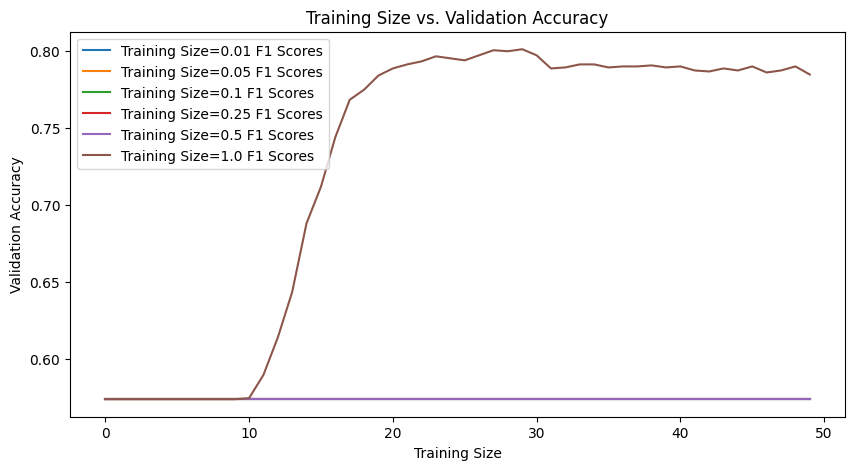

In [196]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

df_train = pd.read_csv('data/kaggle-disaster-tweets/train.csv')
df_train.fillna('', inplace=True)
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_train['text']).toarray()
y = df_train['target'].values

class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'texts': torch.tensor(self.texts[idx], dtype=torch.float32).to(device),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long).to(device)
        }

    def __len__(self):
        return len(self.labels)

class TweetClassifier(nn.Module):
    def __init__(self, num_features, hidden_count=4096, dropout_p=0.35):
        super(TweetClassifier, self).__init__()
        self.sequence = nn.Sequential(
            nn.Linear(num_features, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, hidden_count),
            nn.ReLU(),
            nn.Dropout(p=dropout_p),
            nn.Linear(hidden_count, 2),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.sequence(x)

model = TweetClassifier(num_features=X.shape[1]).to(device)

BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 3e-6
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-3)
lr_scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

train_sizes = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]
val_accuracies = []

for size in train_sizes:
    
    if size < 1.0:
        X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, random_state=42)
        X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    else:
        # Use all data for training, then split for validation
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
    # if size < 1.0:
    #     X_sample, X_val, y_sample, y_val =  train_test_split(X, y, test_size=0.2, random_state=42)
    #     X_train, _, y_train, _ = train_test_split(X_sample, y_sample, train_size=size, random_state=42)
    # else:
    #     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Sample training data
    # X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, random_state=42)
    # X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    
    train_dataset = TweetDataset(X_train, y_train)
    val_dataset = TweetDataset(X_val, y_val)
    
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = TweetClassifier(num_features=X.shape[1]).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-3)
    
    curr_val_accs = []
    for epoch in range(EPOCHS):
        model.train()
        for batch in tqdm(train_loader, desc=f"Train [{size}], Epoch={epoch+1}/{EPOCHS}"):
            optimizer.zero_grad()
            outputs = model(batch['texts'])
            loss = criterion(outputs, batch['labels'])
            loss.backward()
            optimizer.step()
            
        model.eval()
        total_correct = 0
        total = 0
        with torch.no_grad():
            for batch in val_loader:
                outputs = model(batch['texts'])
                _, predicted = torch.max(outputs.data, 1)
                total_correct += (predicted == batch['labels']).sum().item()
                total += batch['labels'].size(0)
        
        val_accuracy = total_correct / total
        curr_val_accs.append(val_accuracy)
        
        lr_scheduler.step(val_accuracy)
        
    val_accuracies.append(curr_val_accs)

plt.figure(figsize=(10, 5))
for i, f1 in enumerate(val_accuracies):
    plt.plot(f1, label=f'Training Size={train_sizes[i]} F1 Scores')


# plt.plot(train_sizes, val_accuracies, marker='o')
plt.title('Training Size vs. Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Validation Accuracy')
plt.legend(loc=2)
# plt.grid(True)
plt.show()

## NB Train Sizes Varying

Validation Accuracy: 0.5968483256730138
[0.01] Validation F1 Score:0.554775860471206
Validation Accuracy: 0.6795797767564018
[0.05] Validation F1 Score:0.6756070483002622
Validation Accuracy: 0.7255416940249507
[0.1] Validation F1 Score:0.7253738339139256
Validation Accuracy: 0.7465528562048588
[0.25] Validation F1 Score:0.7454272804058362
Validation Accuracy: 0.7774130006565988
[0.5] Validation F1 Score:0.7757471322661194
Validation Accuracy: 0.7820091923834537
[1.0] Validation F1 Score:0.7806734072497191


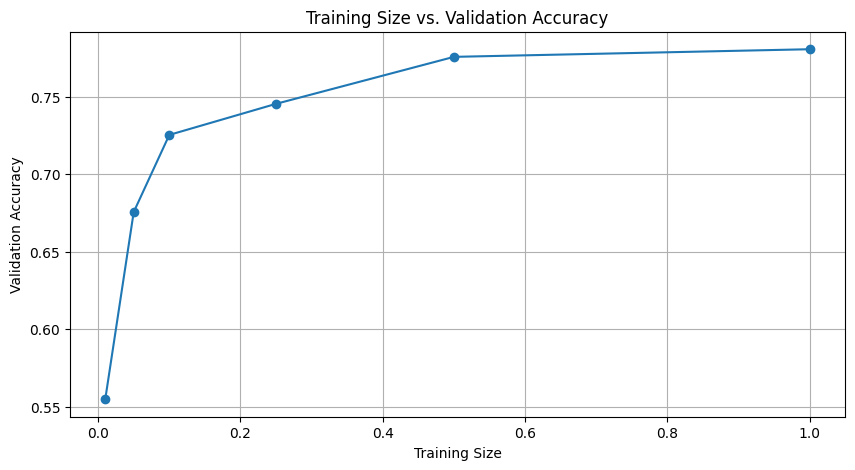

In [194]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

df_train = pd.read_csv('data/kaggle-disaster-tweets/train.csv')
df_train.fillna('', inplace=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_train['text']).toarray()
y = df_train['target'].values

train_sizes = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]
val_accuracies = []

for size in train_sizes:
    
    if size < 1.0:
        X_sample, X_val, y_sample, y_val =  train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, _, y_train, _ = train_test_split(X_sample, y_sample, train_size=size, random_state=42)
    else:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # if size < 1.0:
    #     # Sample a subset of the training data
    #     X_sample, _, y_sample, _ = train_test_split(X, y, train_size=size, random_state=42)
    #     X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    # else:
    #     # Use all data for training, then split for validation
    #     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model_nb = MultinomialNB(alpha=0.1, fit_prior=True)

    model_nb.fit(X_train, y_train)
    y_pred = model_nb.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='weighted')
    print("Validation Accuracy:", accuracy_score(y_val, y_pred))
    print(f"[{size}] Validation F1 Score:{f1}")
    
    val_accuracies.append(f1)
    
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, val_accuracies, marker='o')
plt.title('Training Size vs. Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Validation Accuracy')
# plt.legend(loc=2)
plt.grid(True)
plt.show()

## Boosted Trees Train Sizes Varying

[0.01] Validation F1 Score:0.45261295082715564
[0.05] Validation F1 Score:0.5777459966409728
[0.1] Validation F1 Score:0.6899012629144139
[0.25] Validation F1 Score:0.7232384681937838
[0.5] Validation F1 Score:0.7566047999977481
[1.0] Validation F1 Score:0.7716943241543787


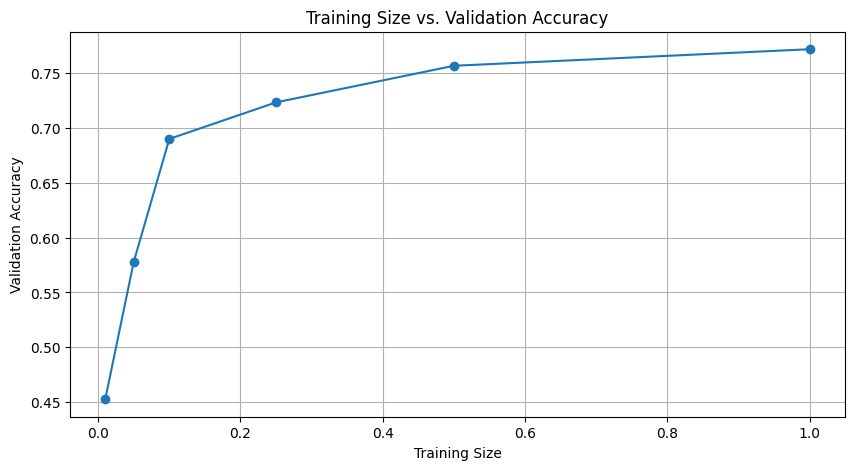

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

df_train = pd.read_csv('data/kaggle-disaster-tweets/train.csv')
df_train.fillna('', inplace=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df_train['text']).toarray()
y = df_train['target'].values

train_sizes = [0.01, 0.05, 0.1, 0.25, 0.5, 1.0]
val_accuracies = []

for size in train_sizes:
    if size < 1.0:
        X_sample, X_val, y_sample, y_val =  train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, _, y_train, _ = train_test_split(X_sample, y_sample, train_size=size, random_state=42)
    else:
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
    model = GradientBoostingClassifier(n_estimators=750, learning_rate=0.1, max_depth=4, random_state=42, min_samples_split=4, loss='log_loss')

    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    print(f"[{size}] Validation F1 Score:{f1}")
    
    val_accuracies.append(f1)
    
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, val_accuracies, marker='o')
plt.title('Training Size vs. Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Validation Accuracy')
# plt.legend(loc=2)
plt.grid(True)
plt.show()